In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---
#### CS 260 Final Project - Spring 2022
---

# Crime Statistics in the United States

### By: Chris Klepacki, Dan Deluca, Christian Reilly


---

## 1. Introduction

We examined the rate of crime in the US as it coincides with population growth. Our goal was to see if as population increased, did crimes rates follow a similar pattern (within PA and nationally) or did trends act differently possibly due to new laws or regualations. After examining the trends in several different crimes, we surmised that crime does not increase equally to population increase. To help us arrive at this conclusion, we answered the following questions.

1. Does crime rate increase linearly or exponentially with population increase?
2. In the United States which category of crime has increased the most and which has decreased the most?
3. Which state has shown the sharpest decline in burglary crime, and when was there there sharpest decrease?
4. What year in the state of Pennsylvania had the worst amount of assault crimes, and by how much has it decreased from that year?
5. Has violent crimes or property crimes changed the most since 1990?



---

## 2. Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/chkl112/database_final_project/main/State%20Crime%20Data%20(full)%20-%201960-2019%20details%20by%20year%20(1).csv")
data = data[data["year"] <= 2010]
data

,state,decade,year,population,rateP_all,rateP_burglary,rateP_larceny,rateP_motor,rateV_all,rateV_assault,...,rateV_robbery,totP_all,totP_burglary,totP_larceny,totP_motor,totV_all,totV_assault,totV_murder,totV_rape,totV_robbery
0,Alabama,1960s,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,...,27.5,33823.0,11626.0,19344.0,2853.0,6097.0,4512.0,406,281,898
1,Alabama,1960s,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,...,19.1,32541.0,11205.0,18801.0,2535.0,5564.0,4255.0,427,252,630
2,Alabama,1960s,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,...,22.5,35829.0,11722.0,21306.0,2801.0,5283.0,3995.0,316,218,754
3,Alabama,1960s,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,...,24.7,38521.0,12614.0,22874.0,3033.0,6115.0,4755.0,340,192,828
4,Alabama,1960s,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,...,29.1,46290.0,15898.0,26713.0,3679.0,7260.0,5555.0,316,397,992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,Wyoming,2000s,2006,515004,2986.6,450.9,2379.6,156.1,253.8,208.0,...,14.0,15381.0,2322.0,12255.0,804.0,1307.0,1071.0,13,151,72
3102,Wyoming,2000s,2007,522830,2879.1,452.3,2271.3,155.5,257.1,204.1,...,16.1,15053.0,2365.0,11875.0,813.0,1344.0,1067.0,21,172,84
3103,Wyoming,2000s,2008,532668,2725.0,412.6,2174.7,137.6,249.7,196.4,...,16.3,14515.0,2198.0,11584.0,733.0,1330.0,1046.0,12,185,87
3104,Wyoming,2000s,2009,544270,2616.9,399.8,2078.0,139.1,219.7,171.8,...,14.3,14243.0,2176.0,11310.0,757.0,1196.0,935.0,11,172,78


This dataset was previously obtained by Pr. Craig in, MG-212, Data Anlysis. This allowed our team to more easily understand and analyze this dataset, because there was previous experience with it.

Below is a list of each variable in the dataset and its explanation.

* **state: US state**
* **decade: time period (1960s - 2010s)**
* **year: specific year (1960 - 2019)**
* **population: state population during give year**
* **rateP_all: total rate of all property crimes (totP_all / population)**
* **rateP_burglary: rate of burglaries (totP_burglary / population)**
* **rateP_larceny: rate of larcenies (totP_larceny / population)**
* **rateP_motor: rate of motor crimes (totP_motor / population)**
* **rateV_all: total rate of all violent crimes (totV_all / population)**
* **rateV_assault: rate of assaults (totV_assault / population)**
* **rateV_murder: rate of murders (totV_murder / population)**
* **rateV_rape: rate of rapes (totV_rape / population)**
* **rateV_robbery: rate of robberies (totV_robbery / population)**
* **totP_all: total number of all property crimes**
* **totP_burglary: total number of burglaries**
* **totP_larceny: total number of larcenies**
* **totP_motor: total number of motor crimes**
* **totV_all: total number of all violent crimes**
* **totV_assault: total number of assaults**
* **totV_murder: total number of murders**
* **totV_rape: total number of rapes**
* **totV_robbery: total number of robberies**

---

## 3. Results

### 3.1 - Pennsylvania

Text(0, 0.5, 'Assault Rate (Total Assaults / Population)')

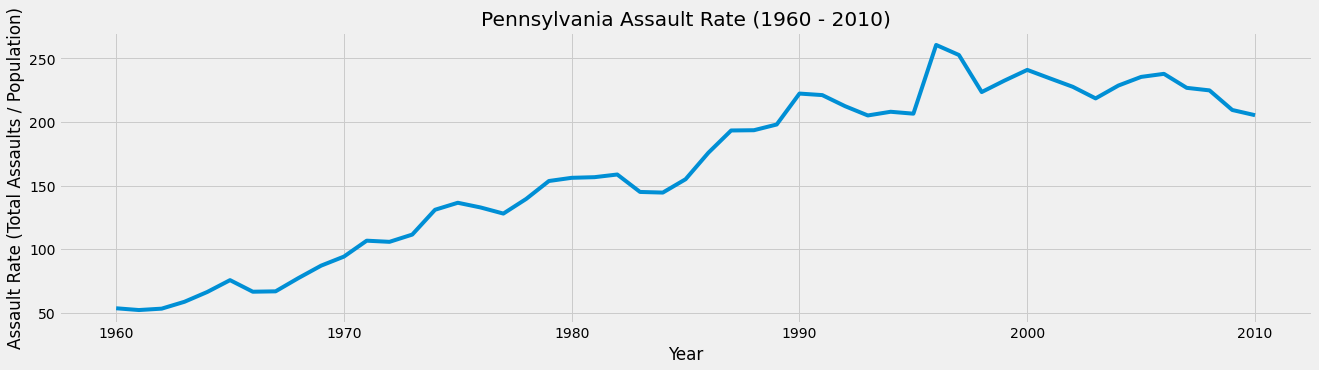

In [ ]:
PA_stats = data[data["state"] == "Pennsylvania"]
plt.figure(figsize =(20,5))
plt.plot(PA_stats["year"], PA_stats["rateV_assault"])
plt.title("Pennsylvania Assault Rate (1960 - 2010)")
plt.xlabel("Year")
plt.ylabel("Assault Rate (Total Assaults / Population)")

**This line plot shows the change is assault rate in Pennsylvania between 1960 and 2010. It shows that the assault rate peeked during the mid 1990s and has been decreasing since then. It can be observed that Pennsylvania is on a downward trend with their assault rate.**

Text(0, 0.5, 'Number of Each Crime (x1000)')

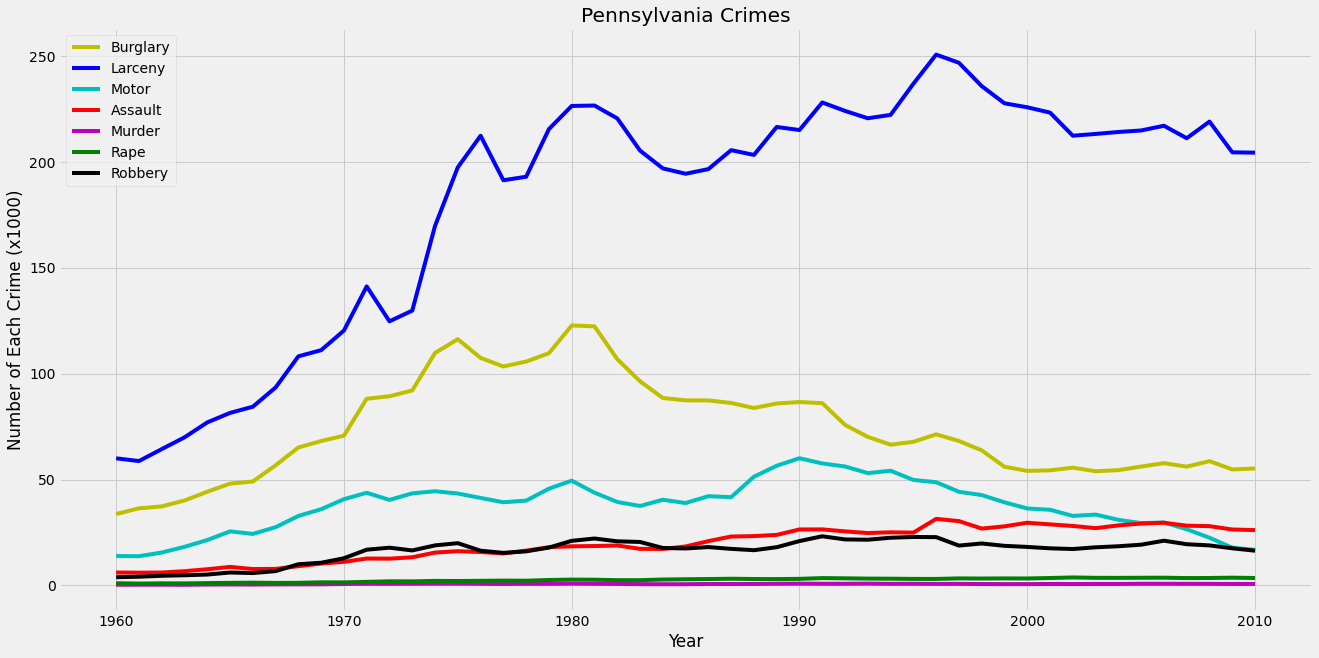

In [ ]:
dataPa = data[data['state'] == "Pennsylvania"]
dataPa1 = dataPa.groupby(['year']).sum()
plt.figure(figsize =(20,10))
plt.plot(dataPa1.index, dataPa1['totP_burglary']/1000, label = "Burglary",color = 'y')
plt.plot(dataPa1.index, dataPa1['totP_larceny']/1000, label = "Larceny",color = 'b')
plt.plot(dataPa1.index, dataPa1['totP_motor']/1000, label = "Motor",color = 'c')
plt.plot(dataPa1.index, dataPa1['totV_assault']/1000, label = "Assault",color = 'r')
plt.plot(dataPa1.index, dataPa1['totV_murder']/1000, label = "Murder",color = 'm')
plt.plot(dataPa1.index, dataPa1['totV_rape']/1000, label = "Rape",color = 'g')
plt.plot(dataPa1.index, dataPa1['totV_robbery']/1000, label = "Robbery",color = 'k')
plt.legend()
plt.title('Pennsylvania Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Each Crime (x1000)')



This graph shows the total number occurances of each crime in Pennsylvania from 1960 to 2010. It shows a clear peak peak in most crimes in the 80s or 90s with a gradual decline since then. It also shows that the total number of crimes in PA are decreasing, in addition to the crime rate itself.

### 3.2 National

Text(0, 0.5, 'Violent Crime Rate')

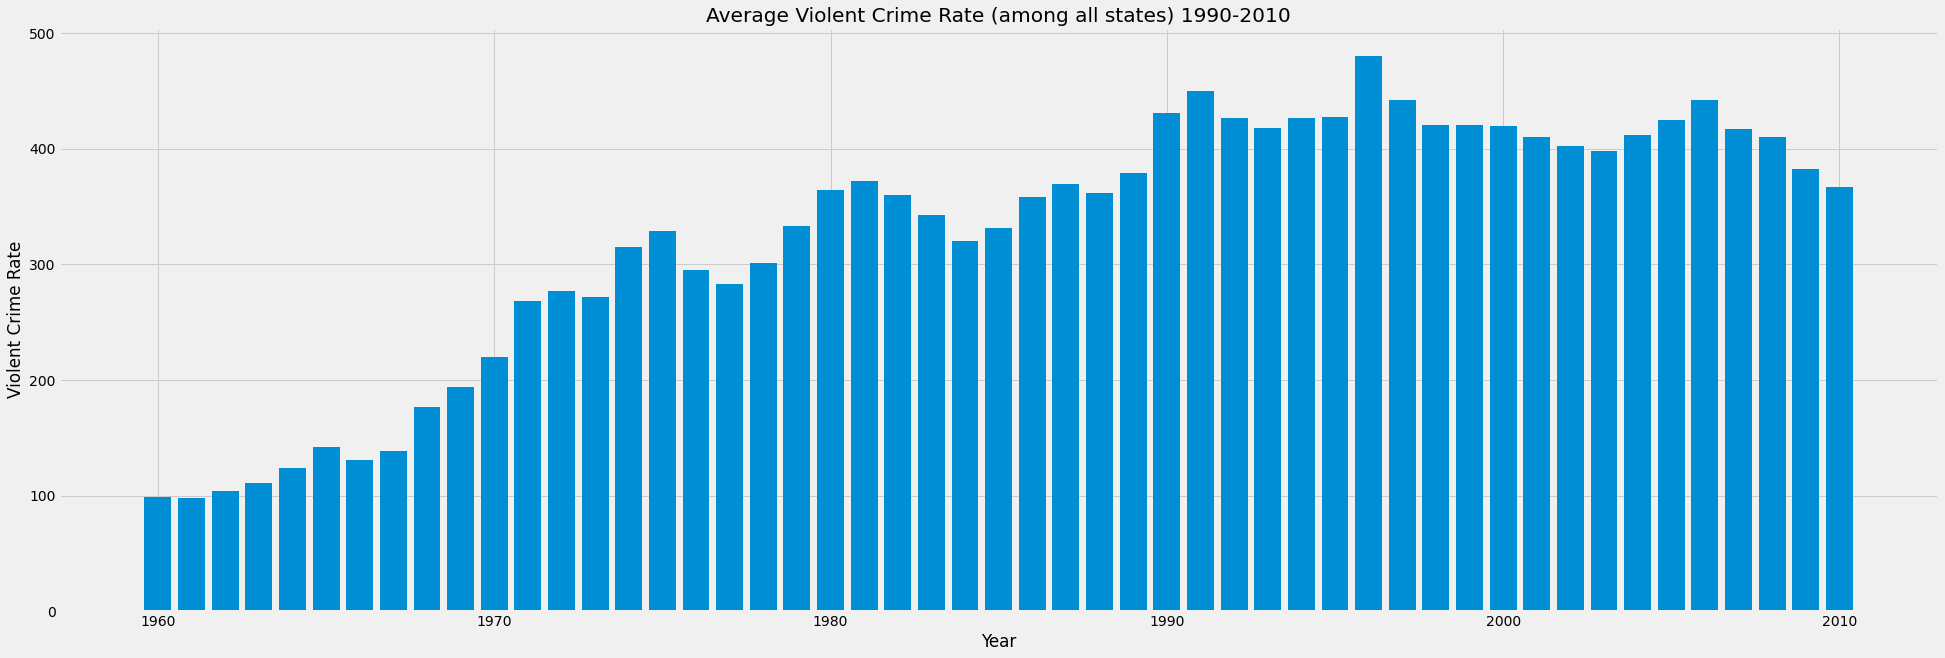

In [ ]:
since_1990 = data[data["year"] >= 1990]
since_1990 = data[data["state"] == "Pennsylvania"]
crimes_since_1990 = since_1990.groupby("year", as_index=False).mean()
plt.figure(figsize =(30,10))
plt.bar(crimes_since_1990["year"], crimes_since_1990["rateV_all"])
plt.title("Average Violent Crime Rate (among all states) 1990-2010")
plt.xlabel("Year")
plt.ylabel("Violent Crime Rate")

**This line graph shows the average violent crime among all states per year from 1990-2010. It shows a significant peak in the early 90s and a sharp decrease since then. We can see that a trend similar to PA exists at a national level.**

Text(0, 0.5, 'Property Crime Rate')

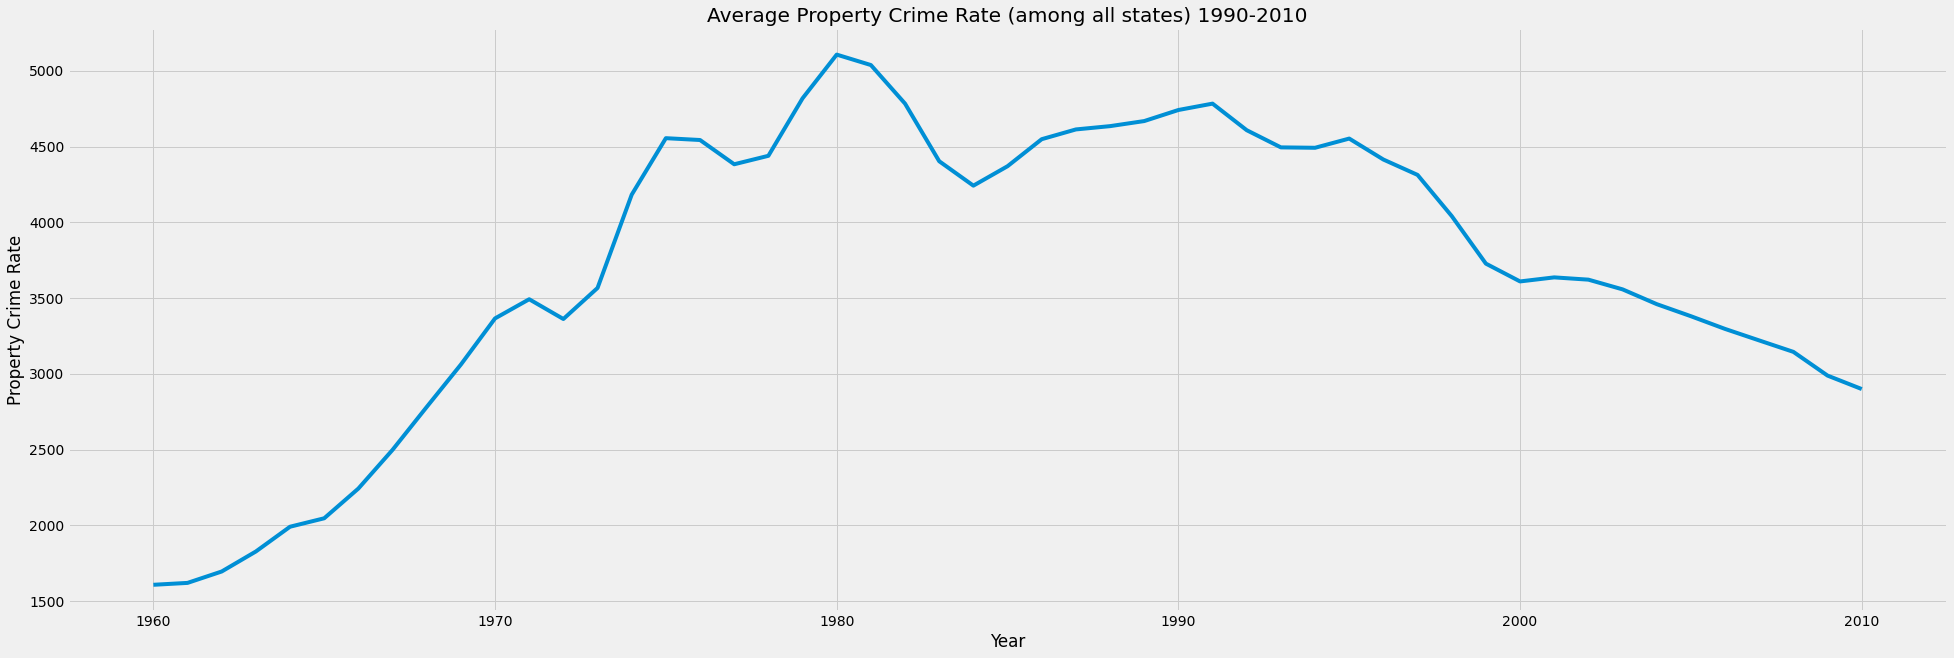

In [ ]:
crimes_since_1990 = data.groupby("year", as_index=False).mean()
plt.figure(figsize =(30,10))
plt.plot(crimes_since_1990["year"], crimes_since_1990["rateP_all"])
plt.title("Average Property Crime Rate (among all states) 1990-2010")
plt.xlabel("Year")
plt.ylabel("Property Crime Rate")

**This line graph shows the average property crime among all states per year from 1990-2010. As the years get closer to modern day we see that property crime has decreased. Property related crimes show an even more promising decline**

No handles with labels found to put in legend.


Text(0, 0.5, 'Population (x1000)')

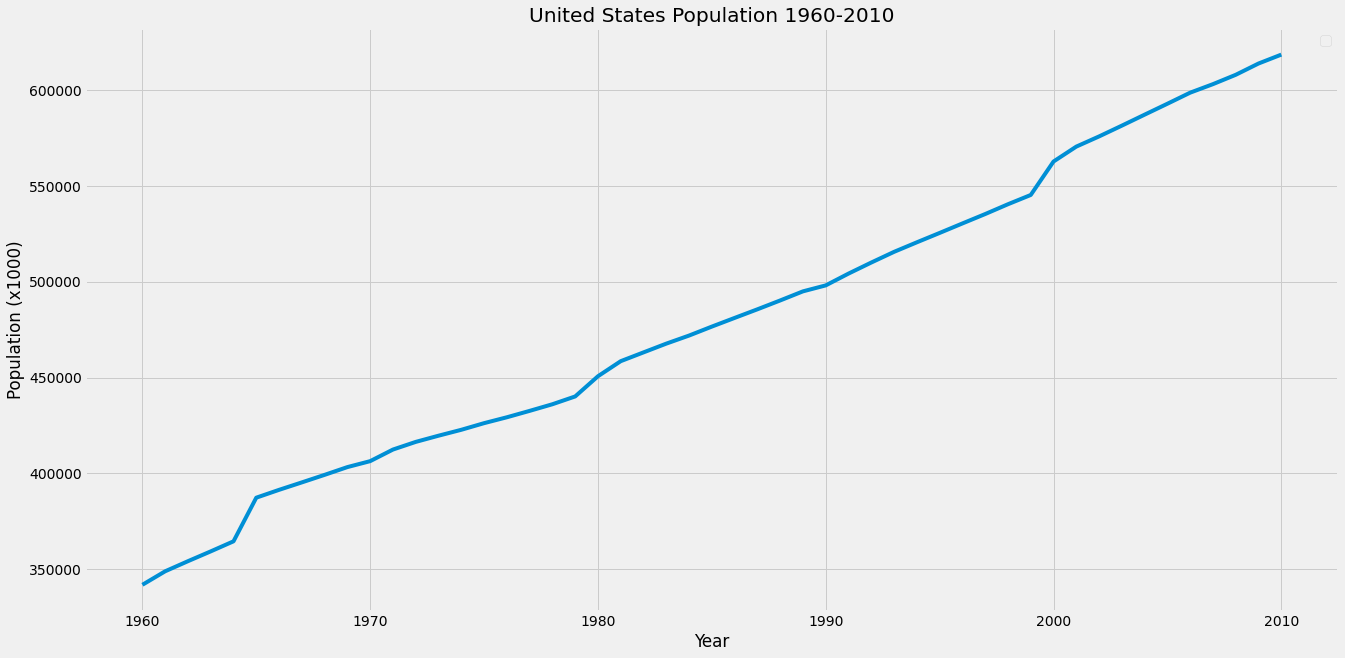

In [ ]:
plt.figure(figsize =(20,10))
plt.plot(usa_crimes.index, usa_crimes['population']/1000)
plt.legend()
plt.title('United States Population 1960-2010')
plt.xlabel('Year')
plt.ylabel('Population (x1000)')

To examine crime at national scale in relation to population, we first made a simple visualization of the population increase. Here we can see a fairly linear increase in population (1960-2010)

Text(0, 0.5, 'Number of Each Crime (x1000)')

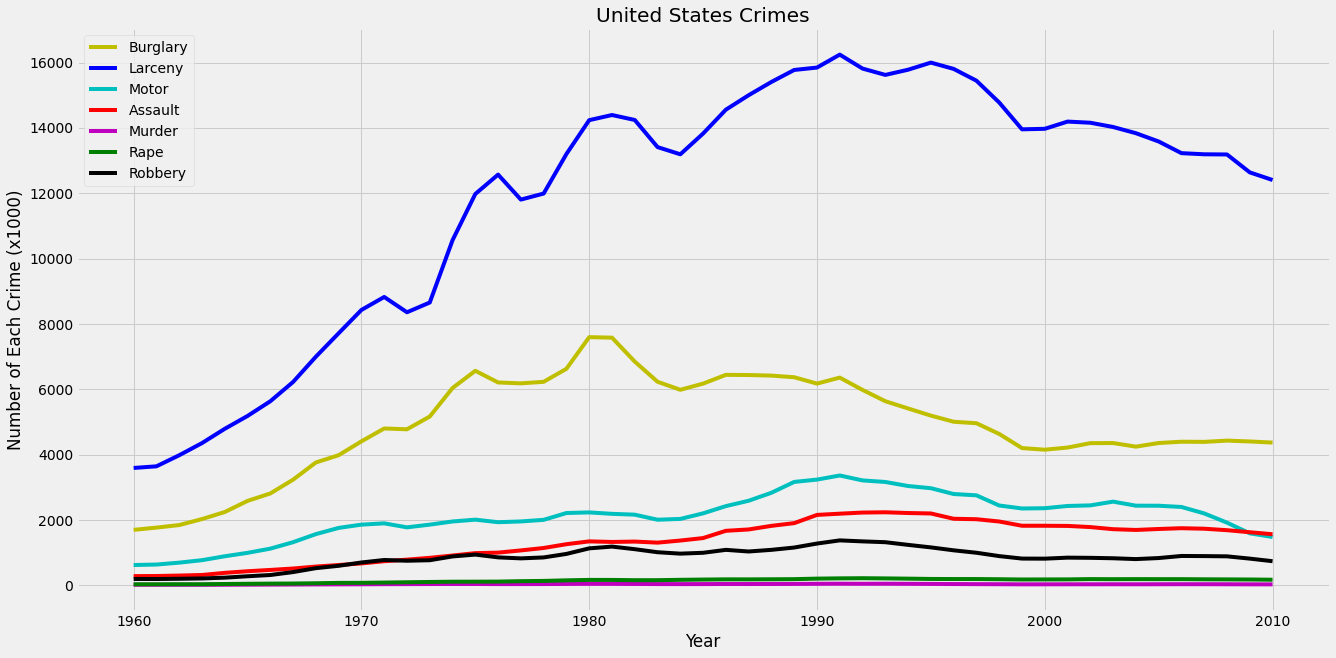

In [ ]:
usa_crimes = data.groupby(['year']).sum()
usa_crimes = usa_crimes[['totP_burglary', 'totP_larceny','totP_motor','totV_assault','totV_murder','totV_rape','totV_robbery','population']]
plt.figure(figsize =(20,10))
plt.plot(usa_crimes.index, usa_crimes['totP_burglary']/1000, label = "Burglary",color = 'y')
plt.plot(usa_crimes.index, usa_crimes['totP_larceny']/1000, label = "Larceny",color = 'b')
plt.plot(usa_crimes.index, usa_crimes['totP_motor']/1000, label = "Motor",color = 'c')
plt.plot(usa_crimes.index, usa_crimes['totV_assault']/1000, label = "Assault",color = 'r')
plt.plot(usa_crimes.index, usa_crimes['totV_murder']/1000, label = "Murder",color = 'm')
plt.plot(usa_crimes.index, usa_crimes['totV_rape']/1000, label = "Rape",color = 'g')
plt.plot(usa_crimes.index, usa_crimes['totV_robbery']/1000, label = "Robbery",color = 'k')
plt.legend()
plt.title('United States Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Each Crime (x1000)')


Over that same time period, we can see the total number of committed crimes has changed since then. Interestingly, most crimes peaked in their numbers in the 1990s, and all crimes have seen a decrease in numbers since. Especially so is the number of burglaries which used to see numbers double that of the latest decade.

Text(0.5, 1.0, 'Crimes commited per size of populaion')

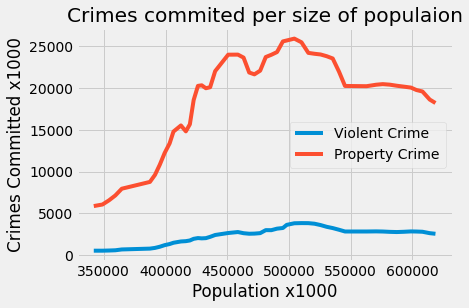

In [ ]:
increase = data.groupby('year').sum()
plt.plot(increase["population"]/1000, increase["totV_all"]/1000, label = "Violent Crime")
plt.plot(increase["population"]/1000, increase["totP_all"]/1000, label = "Property Crime")
plt.legend()
plt.xlabel("Population x1000")
plt.ylabel("Crimes Committed x1000")
plt.title("Crimes commited per size of populaion")


This graph shows the changes in Violent and Petty crime numbers as population has risen. It shows a small increase in the number of violent crimes and a substantial increase in petty crimes.

### 3.3 State by State

In [ ]:
no_us = data[(data['state'] != 'United States')]

highest = no_us.sort_values('rateP_all',ascending = False)
highest_2 = highest[(highest['year'] == 2010)]

Text(0, 0.5, 'Total Rate of Property Crimes')

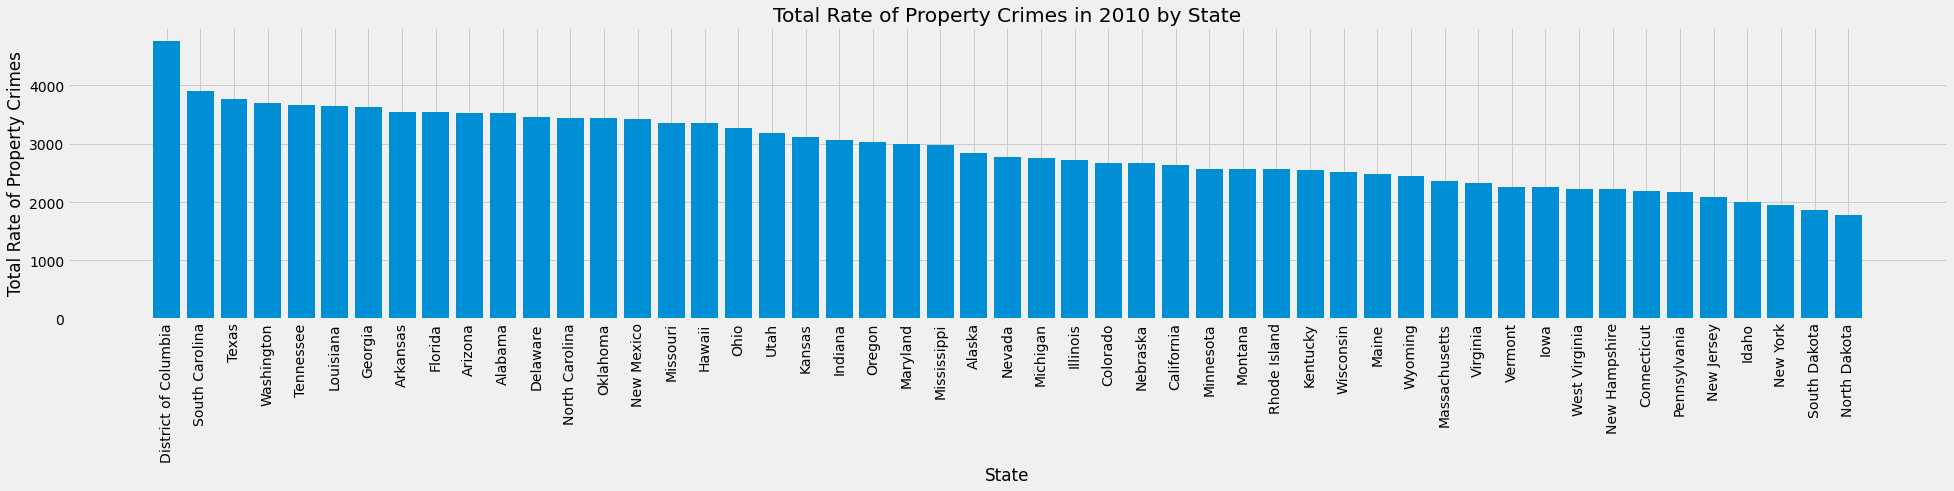

In [ ]:
plt.figure(figsize =(30,5))
plt.bar(highest_2['state'],highest_2['rateP_all'])
plt.xticks(rotation = 90)
plt.title('Total Rate of Property Crimes in 2010 by State')
plt.xlabel('State')
plt.ylabel('Total Rate of Property Crimes')

This bar graph shows the ranking from greatest to lowest of the rate of property crime in each state in 2010. This bar graph shows that the District of Columbia has the highest rate of property crime in 2019 and that Massachusetts has the lowest. It also shows how closely related many states actually are.

In [ ]:
highest_3 = no_us.sort_values('rateV_all',ascending = False)
highest_4 = highest_3[(highest_3['year'] == 2010)]

Text(0, 0.5, 'Total Rate of Violent Crimes')

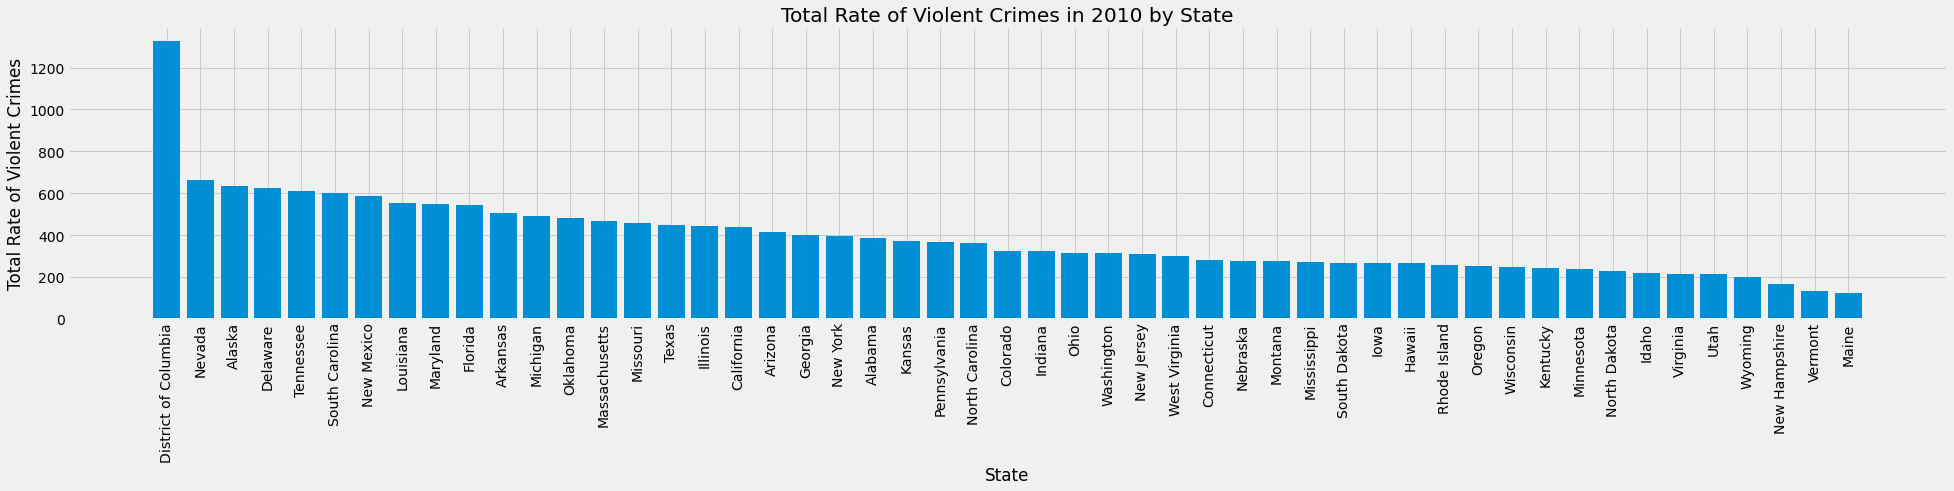

In [ ]:
plt.figure(figsize =(30,5))
plt.bar(highest_4['state'],highest_4['rateV_all'])
plt.xticks(rotation = 90)
plt.title('Total Rate of Violent Crimes in 2010 by State')
plt.xlabel('State')
plt.ylabel('Total Rate of Violent Crimes')

*This bar graph shows the ranking from greatest to lowest of the rate of violent crime in each state in 2010. This bar graph shows that the District of Columbia has the highest rate of violent crime in 2010 and that Maine has the lowest *




This bar chart shows the difference in the crimes committed in 1960 compared to 2018.

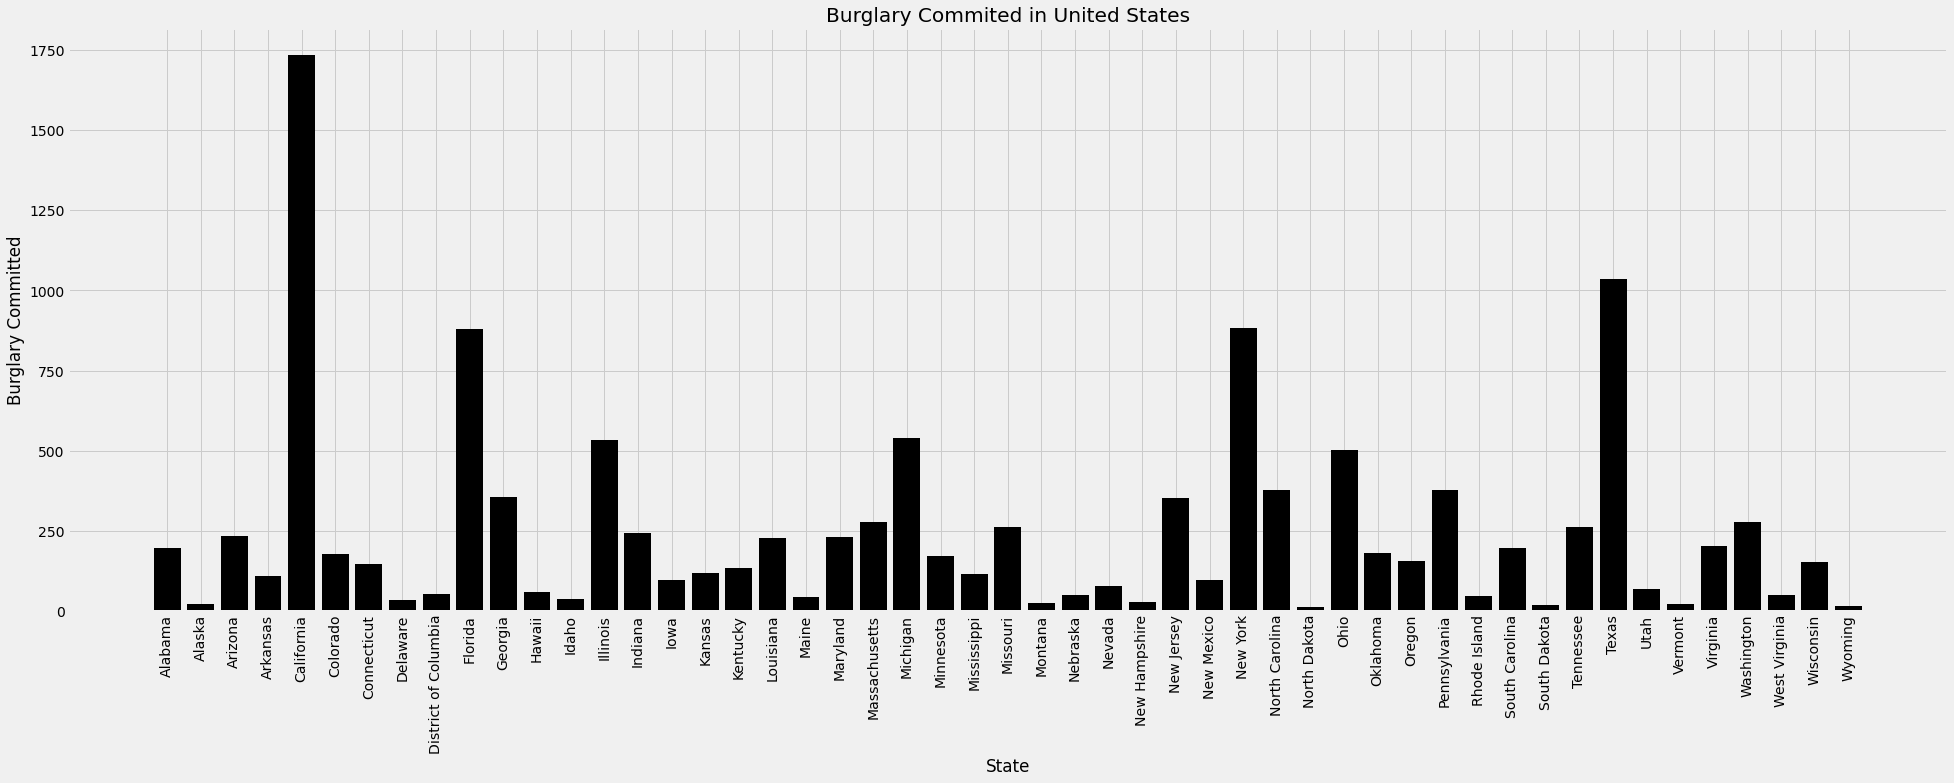

In [ ]:
burg = data.groupby(['state']).sum()
burg = burg.drop("United States")
plt.figure(figsize =(30,10))
plt.bar(burg.index, burg["totP_burglary"]/10000,color = 'k')
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Burglary Committed")
plt.title("Burglary Commited in United States");

This graph shows that total number of burglaries across all states. California, Florida, New York, and Texas can be seen as having the highest numbers.

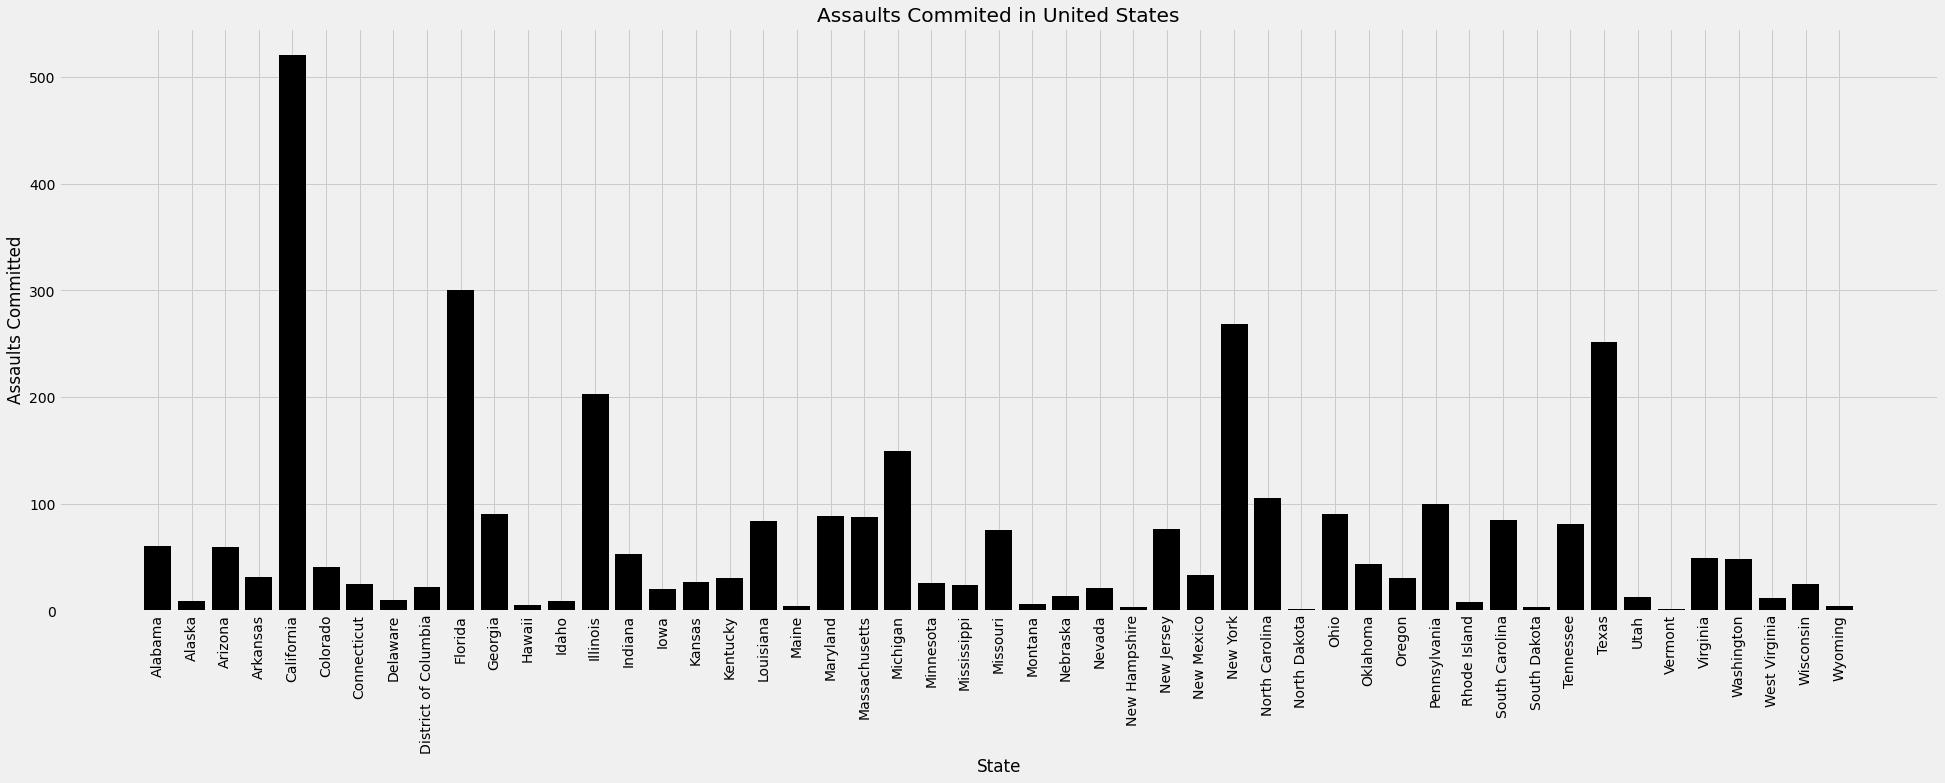

In [ ]:
aslt = data.groupby(['state']).sum()
aslt = aslt.drop("United States")
plt.figure(figsize =(30,10))
plt.bar(aslt.index, aslt["totV_assault"]/10000,color = 'k')
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Assaults Committed")
plt.title("Assaults Commited in United States");

This graph shows that total number of assauls across all states. California,
Florida, New York:, and Texas can be seen as having the highest numbers.

---

## Conclusion

Throughout our analysis, we found a lot of information to help answer our initial questions. Along the way we were surprised by much of the data that we found as we found that crime was at its peak in the 1990s as social, technological, and economic changes were happening and being taken advantage of at these early stages. As a better understanding and protection was put in place over time how crime has decreased. This was made prevalent in an analysis as property crimes saw a larger decrease in the 2010s while violent crimes steadily decreased over time. This information was surprising as we also realized as population increases, crime does not necessarily follow that trend. In the future some questions we would like to ask:


*   Why does Pennsylvania particularly did not have a decrease as the average of the entire United States saw a major decrease after the 90s?
* How does the crime distribution between the safest and most dangerous state compare?
*   Asking more about specific questions to answers questions such as where is the safest place to live in America?

